In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [3]:
dataset = pd.read_csv('2020_data.csv')

/Users/sangdonlee/opt/anaconda3/envs/python37-2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 3000)
pd.set_option('display.width', 3000)

In [5]:
dataset

,player_name,date,tournament,statistic,variable,value
0,Luke List,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,RANK THIS WEEK,1
1,Rory McIlroy,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,RANK THIS WEEK,1
2,Xander Schauffele,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,RANK THIS WEEK,1
3,Collin Morikawa,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,RANK THIS WEEK,1
4,Jordan Spieth,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,RANK THIS WEEK,5
...,...,...,...,...,...,...
1197179,Nick Taylor,2019-09-15,A Military Tribute at The Greenbrier,Longest Putts,DISTANCE,"17' 4"""
1197180,Russell Henley,2019-09-15,A Military Tribute at The Greenbrier,Longest Putts,DISTANCE,"17' 3"""
1197181,Brian Harman,2019-09-15,A Military Tribute at The Greenbrier,Longest Putts,DISTANCE,"16' 1"""
1197182,Joel Dahmen,2019-09-15,A Military Tribute at The Greenbrier,Longest Putts,DISTANCE,"14' 0"""


In [6]:
StatVar = dataset['statistic'] + ' - (' + dataset['variable'] + ')'
del dataset['variable']
dataset['variable'] = StatVar

In [7]:
dataset.head(10)

,player_name,date,tournament,statistic,value,variable
0,Luke List,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,1,Fairway Bunker Tendency - (RANK THIS WEEK)
1,Rory McIlroy,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,1,Fairway Bunker Tendency - (RANK THIS WEEK)
2,Xander Schauffele,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,1,Fairway Bunker Tendency - (RANK THIS WEEK)
3,Collin Morikawa,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,1,Fairway Bunker Tendency - (RANK THIS WEEK)
4,Jordan Spieth,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,5,Fairway Bunker Tendency - (RANK THIS WEEK)
5,Joel Dahmen,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,5,Fairway Bunker Tendency - (RANK THIS WEEK)
6,Scott Piercy,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,5,Fairway Bunker Tendency - (RANK THIS WEEK)
7,Jason Day,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,5,Fairway Bunker Tendency - (RANK THIS WEEK)
8,Dylan Frittelli,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,5,Fairway Bunker Tendency - (RANK THIS WEEK)
9,Gary Woodland,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,5,Fairway Bunker Tendency - (RANK THIS WEEK)


In [8]:
wide_df = dataset.set_index(['player_name', 'variable', 'date', 'tournament'])['value'].unstack('variable').reset_index()

In [9]:
wide_df.head()

variable,player_name,date,tournament,% of Potential Pts won - FedExCup Regular Season - (%),% of Potential Pts won - FedExCup Regular Season - (RANK THIS WEEK),1-Putts per Round - (AVG),1-Putts per Round - (RANK THIS WEEK),11-25 Final Round Performance - (% TIMES IMPROVED),11-25 Final Round Performance - (RANK THIS WEEK),2-Putts per Round - (AVG),2-Putts per Round - (RANK THIS WEEK),25+ Final Round Performance - (% TIMES IMPROVED),25+ Final Round Performance - (RANK THIS WEEK),3+ Putts per Round - (AVG),3+ Putts per Round - (RANK THIS WEEK),3-Putt Avoidance - (%),3-Putt Avoidance - (RANK THIS WEEK),3-Putt Avoidance - 10-15' - (%),3-Putt Avoidance - 10-15' - (RANK THIS WEEK),3-Putt Avoidance - 15-20' - (%),3-Putt Avoidance - 15-20' - (RANK THIS WEEK),3-Putt Avoidance - 20-25' - (%),3-Putt Avoidance - 20-25' - (RANK THIS WEEK),3-Putt Avoidance - 5-10' - (%),3-Putt Avoidance - 5-10' - (RANK THIS WEEK),3-Putt Avoidance - Inside 5' - (%),3-Putt Avoidance - Inside 5' - (RANK THIS WEEK),3-Putt Avoidance - Round 1 - (%),3-Putt Avoidance - Round 1 - (RANK THIS WEEK),3-Putt Avoidance - Round 2 - (%),3-Putt Avoidance - Round 2 - (RANK THIS WEEK),3-Putt Avoidance - Round 3 - (%),3-Putt Avoidance - Round 3 - (RANK THIS WEEK),3-Putt Avoidance - Round 4 - (%),3-Putt Avoidance - Round 4 - (RANK THIS WEEK),3-Putt Avoidance > 25' - (%),3-Putt Avoidance > 25' - (RANK THIS WEEK),3-Putts per Round - (AVG),3-Putts per Round - (RANK THIS WEEK),6-10 Final Round Performance - (% TIMES IMPROVED),6-10 Final Round Performance - (RANK THIS WEEK),Accuracy Rating - (RANK THIS WEEK),Accuracy Rating - (RATING),All-Around Ranking - (RANK THIS WEEK),All-Around Ranking - (TOTAL),Approach 100-125 yards (RTP Score) - (AVG RTP),Approach 100-125 yards (RTP Score) - (RANK THIS WEEK),Approach 125-150 yards (RTP Score) - (AVG RTP),Approach 125-150 yards (RTP Score) - (RANK THIS WEEK),Approach 150-175 yards (RTP Score) - (AVG RTP),Approach 150-175 yards (RTP Score) - (RANK THIS WEEK),Approach 175-200 yards (RTP Score) - (AVG RTP),Approach 175-200 yards (RTP Score) - (RANK THIS WEEK),Approach 200-225 yards (RTP) - (AVG RTP),Approach 200-225 yards (RTP) - (RANK THIS WEEK),Approach 225-250 yards (RTP) - (AVG RTP),Approach 225-250 yards (RTP) - (RANK THIS WEEK),Approach 250-275 yards (RTP) - (AVG RTP),Approach 250-275 yards (RTP) - (RANK THIS WEEK),Approach 50-75 yards (RTP Score) - (AVG RTP),Approach 50-75 yards (RTP Score) - (RANK THIS WEEK),Approach 75-100 yards (RTP Score) - (AVG RTP),Approach 75-100 yards (RTP Score) - (RANK THIS WEEK),Approach < 125 yards (RTP Score) - (AVG RTP),Approach < 125 yards (RTP Score) - (RANK THIS WEEK),Approach > 200 yards (RTP Score) - (AVG RTP),Approach > 200 yards (RTP Score) - (RANK THIS WEEK),Approach > 275 yards (RTP) - (AVG RTP),Approach > 275 yards (RTP) - (RANK THIS WEEK),Approach Putt Performance - (RANK THIS WEEK),Approach Putt Performance - (VALUE),Approaches 100-125 yards-Rgh (RTP) - (AVG RTP),Approaches 100-125 yards-Rgh (RTP) - (RANK THIS WEEK),Approaches 125-150 yards-Rgh (RTP) - (AVG RTP),Approaches 125-150 yards-Rgh (RTP) - (RANK THIS WEEK),Approaches 150-175 yards-Rgh (RTP) - (AVG RTP),Approaches 150-175 yards-Rgh (RTP) - (RANK THIS WEEK),Approaches 175-200 yards-Rgh (RTP) - (AVG RTP),Approaches 175-200 yards-Rgh (RTP) - (RANK THIS WEEK),Approaches 200-225 yards-Rgh (RTP) - (AVG RTP),Approaches 200-225 yards-Rgh (RTP) - (RANK THIS WEEK),Approaches 225-250 yards-Rgh (RTP) - (AVG RTP),Approaches 225-250 yards-Rgh (RTP) - (RANK THIS WEEK),Approaches 250-275 yards-Rgh (RTP) - (AVG RTP),Approaches 250-275 yards-Rgh (RTP) - (RANK THIS WEEK),Approaches 50-125 yards-Rgh (RTP) - (AVG RTP),Approaches 50-125 yards-Rgh (RTP) - (RANK THIS WEEK),Approaches 50-75 yards-Rgh (RTP) - (AVG RTP),Approaches 50-75 yards-Rgh (RTP) - (RANK THIS WEEK),Approaches 75-100 yards-Rgh (RTP) - (AVG RTP),Approaches 75-100 yards-Rgh (RTP) - (RANK THIS WEEK),Approaches < 100 yards-Rgh (RTP) - (AVG RTP),Approaches < 100 yards-Rgh (RTP) - (RANK THIS WEEK),Ap

In [8]:
#Narrow down to the more interesting X columns. You could add others.
Keep_Columns = ['player_name',
                'tournament',
                'Total Money (Official and Unofficial) - (MONEY)',
                'Driving Distance - (AVG.)',
                'Driving Accuracy Percentage - (%)',
                'Birdie Average - (AVG)'
               ]

In [9]:
df_selected=wide_df[Keep_Columns]

In [10]:
df_selected.isnull().sum()

variable
player_name                                          0
tournament                                           0
Total Money (Official and Unofficial) - (MONEY)      3
Driving Distance - (AVG.)                          305
Driving Accuracy Percentage - (%)                    1
Birdie Average - (AVG)                               1
dtype: int64

In [11]:
df_selected.rename(columns={'Total Money (Official and Unofficial) - (MONEY)' : 'Total_Money'}, inplace=True)

/Users/sangdonlee/opt/anaconda3/envs/python37-2/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
df_selected.rename(columns={'Driving Distance - (AVG.)' :'Driving_Avg'}, inplace=True)

/Users/sangdonlee/opt/anaconda3/envs/python37-2/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
df_selected.rename(columns={'Driving Accuracy Percentage - (%)' :'Driving_Accuracy'}, inplace=True)

/Users/sangdonlee/opt/anaconda3/envs/python37-2/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
df_selected.rename(columns={'Birdie Average - (AVG)' :'Birdie_Average'}, inplace=True)

/Users/sangdonlee/opt/anaconda3/envs/python37-2/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
df_selected.columns[2:]

Index(['Total_Money', 'Driving_Avg', 'Driving_Accuracy', 'Birdie_Average'], dtype='object', name='variable')

In [16]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_name       1973 non-null   object
 1   tournament        1973 non-null   object
 2   Total_Money       1970 non-null   object
 3   Driving_Avg       1668 non-null   object
 4   Driving_Accuracy  1972 non-null   object
 5   Birdie_Average    1972 non-null   object
dtypes: object(6)
memory usage: 92.6+ KB


In [17]:
df_selected['Driving_Avg'] = df_selected['Driving_Avg'].astype(float)

/Users/sangdonlee/opt/anaconda3/envs/python37-2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player_name       1973 non-null   object 
 1   tournament        1973 non-null   object 
 2   Total_Money       1970 non-null   object 
 3   Driving_Avg       1668 non-null   float64
 4   Driving_Accuracy  1972 non-null   object 
 5   Birdie_Average    1972 non-null   object 
dtypes: float64(1), object(5)
memory usage: 92.6+ KB


In [19]:
df_selected.isna().sum()

variable
player_name           0
tournament            0
Total_Money           3
Driving_Avg         305
Driving_Accuracy      1
Birdie_Average        1
dtype: int64

In [20]:
df_selected['Total_Money'] = df_selected['Total_Money'].fillna(0)

/Users/sangdonlee/opt/anaconda3/envs/python37-2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_selected['Total_Money'] = df_selected['Total_Money'].replace(',', '', regex=True)

/Users/sangdonlee/opt/anaconda3/envs/python37-2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_selected['Total_Money'] = df_selected['Total_Money'].str.replace('$', '')

/Users/sangdonlee/opt/anaconda3/envs/python37-2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_selected['Total_Money'] = df_selected['Total_Money'].replace('', 0, regex=True)

/Users/sangdonlee/opt/anaconda3/envs/python37-2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
np.where(df_selected.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [25]:
df_selected.head()

variable,player_name,tournament,Total_Money,Driving_Avg,Driving_Accuracy,Birdie_Average
0,Aaron Baddeley,Safeway Open,34461,285.1,51.79,3.75
1,Aaron Baddeley,Shriners Hospitals for Children Open,33320,307.9,67.86,5.25
2,Aaron Baddeley,Mayakoba Golf Classic,51480,274.5,62.50,5.25
3,Aaron Baddeley,Farmers Insurance Open,16050,281.6,60.71,3.50
4,Aaron Baddeley,Waste Management Phoenix Open,28835,294.9,57.14,4.00


In [26]:
### change the types from objects to float64

for col in  df_selected.columns[2:]:
   df_selected[col] = df_selected[col].astype(float)
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player_name       1973 non-null   object 
 1   tournament        1973 non-null   object 
 2   Total_Money       1970 non-null   float64
 3   Driving_Avg       1668 non-null   float64
 4   Driving_Accuracy  1972 non-null   float64
 5   Birdie_Average    1972 non-null   float64
dtypes: float64(4), object(2)
memory usage: 92.6+ KB


/Users/sangdonlee/opt/anaconda3/envs/python37-2/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [27]:
## groupby and aggregate with mean sum for the numeric featrues 
df_mean_sum = df_selected.groupby(['player_name'])['Total_Money', 'Driving_Avg', 'Driving_Accuracy', 'Birdie_Average'].agg(['mean','sum']).reset_index()


/Users/sangdonlee/opt/anaconda3/envs/python37-2/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [28]:
## Check columns
df_mean_sum.columns

MultiIndex([(     'player_name',     ''),
            (     'Total_Money', 'mean'),
            (     'Total_Money',  'sum'),
            (     'Driving_Avg', 'mean'),
            (     'Driving_Avg',  'sum'),
            ('Driving_Accuracy', 'mean'),
            ('Driving_Accuracy',  'sum'),
            (  'Birdie_Average', 'mean'),
            (  'Birdie_Average',  'sum')],
           )

In [29]:
## As multi indexed columns concat the indexes to make single index
df_mean_sum.columns = df_mean_sum.columns.map('_'.join)

In [30]:
df_mean_sum.columns

Index(['player_name_', 'Total_Money_mean', 'Total_Money_sum', 'Driving_Avg_mean', 'Driving_Avg_sum', 'Driving_Accuracy_mean', 'Driving_Accuracy_sum', 'Birdie_Average_mean', 'Birdie_Average_sum'], dtype='object')

In [31]:
## drop unneccsary the columns
df_final = df_mean_sum.drop(columns = ['Total_Money_mean', 'Driving_Avg_sum', 'Driving_Accuracy_sum', 'Birdie_Average_sum' ])

In [32]:
df_final.sort_values('Driving_Avg_mean', ascending=False).head()

,player_name_,Total_Money_sum,Driving_Avg_mean,Driving_Accuracy_mean,Birdie_Average_mean
248,Ryan Fox,73500.0,345.6,55.360,4.750
178,Lucas Herbert,36500.0,339.1,50.000,2.500
299,Victor Perez,409100.0,339.1,53.570,4.125
322,Zander Lombard,136500.0,336.0,58.035,4.375
198,Matthias Schwab,419500.0,334.4,50.890,4.000


In [33]:
df_final_corr = df_final.corr()

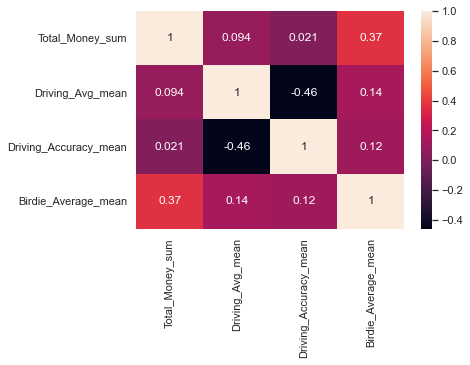

In [34]:
sns.set(style = 'white')
sns.heatmap(df_final_corr, vmax=1, annot=True)

In [35]:
df_final.fillna(df_final.mean(), inplace = True)

In [36]:
df_final.isnull().sum()

player_name_             0
Total_Money_sum          0
Driving_Avg_mean         0
Driving_Accuracy_mean    0
Birdie_Average_mean      0
dtype: int64

In [37]:
df_final.corr()

,Total_Money_sum,Driving_Avg_mean,Driving_Accuracy_mean,Birdie_Average_mean
Total_Money_sum,1.000000,0.091936,0.020546,0.370223
Driving_Avg_mean,0.091936,1.000000,-0.414251,0.120613
Driving_Accuracy_mean,0.020546,-0.414251,1.000000,0.116293
Birdie_Average_mean,0.370223,0.120613,0.116293,1.000000


In [38]:
df_final.describe()

,Total_Money_sum,Driving_Avg_mean,Driving_Accuracy_mean,Birdie_Average_mean
count,3.240000e+02,324.000000,324.000000,324.000000
mean,6.888513e+05,298.075247,60.863674,3.809899
std,9.723887e+05,12.435757,7.785401,0.597520
min,0.000000e+00,250.900000,33.930000,1.750000
25%,7.115625e+04,291.203125,55.698333,3.541667
50%,2.486045e+05,298.075247,60.690625,3.894444
75%,8.955630e+05,303.853125,65.146696,4.162202
max,5.520562e+06,345.600000,85.715000,5.750000


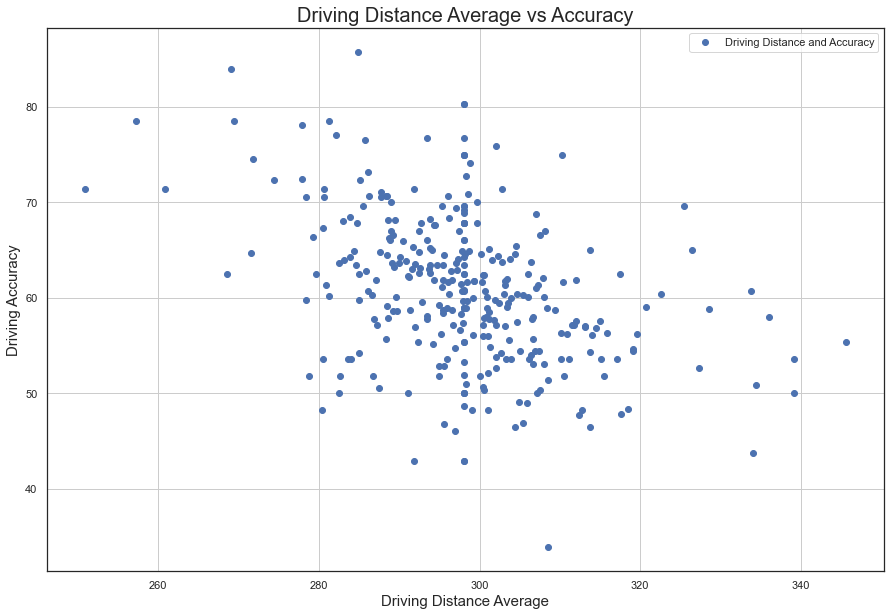

In [64]:
df_final.plot(x='Driving_Avg_mean', y='Driving_Accuracy_mean', style = 'o', figsize=(15,10), label = 'Driving Distance and Accuracy')
plt.grid()
plt.title('Driving Distance Average vs Accuracy', fontsize = 20)
plt.xlabel('Driving Distance Average', fontsize = 15)
plt.ylabel('Driving Accuracy', fontsize = 15)
plt.show()

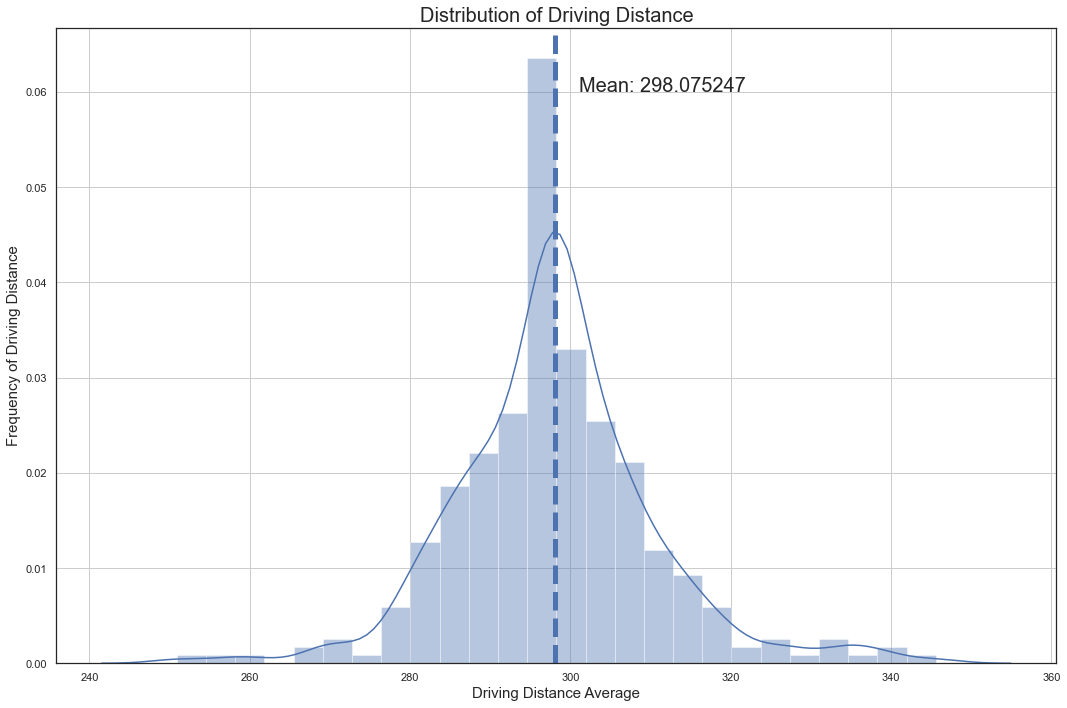

In [45]:
plt.figure(figsize=(15,10))
sns.distplot(df_final['Driving_Avg_mean'])
plt.axvline(df_final['Driving_Avg_mean'].mean(), color = 'b', linestyle='--', linewidth=5)
min_, max_ = plt.ylim()
plt.text(
            df_final['Driving_Avg_mean'].mean() + df_final['Driving_Avg_mean'].mean()/100,
            max_ - max_/10,
            "Mean: {:2f}".format(df_final['Driving_Avg_mean'].mean()),
            fontsize=20
        )
plt.grid()
plt.title('Distribution of Driving Distance', fontsize=20)
plt.xlabel('Driving Distance Average', fontsize=15)
plt.ylabel('Frequency of Driving Distance', fontsize=15)
plt.tight_layout()

In [47]:
X = df_final['Driving_Avg_mean'].values.reshape(-1, 1)
y = df_final['Driving_Accuracy_mean'].values.reshape(-1, 1)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [49]:
regressor = LinearRegression()

In [50]:
regressor.fit(X_train, y_train)

LinearRegression()

In [51]:
print(regressor.intercept_)

[139.81131935]


In [52]:
print(regressor.coef_)

[[-0.26530575]]


In [53]:
y_pred = regressor.predict(X_test)

In [54]:
df_new = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted': y_pred.flatten()})

In [55]:
len(df_new)

65

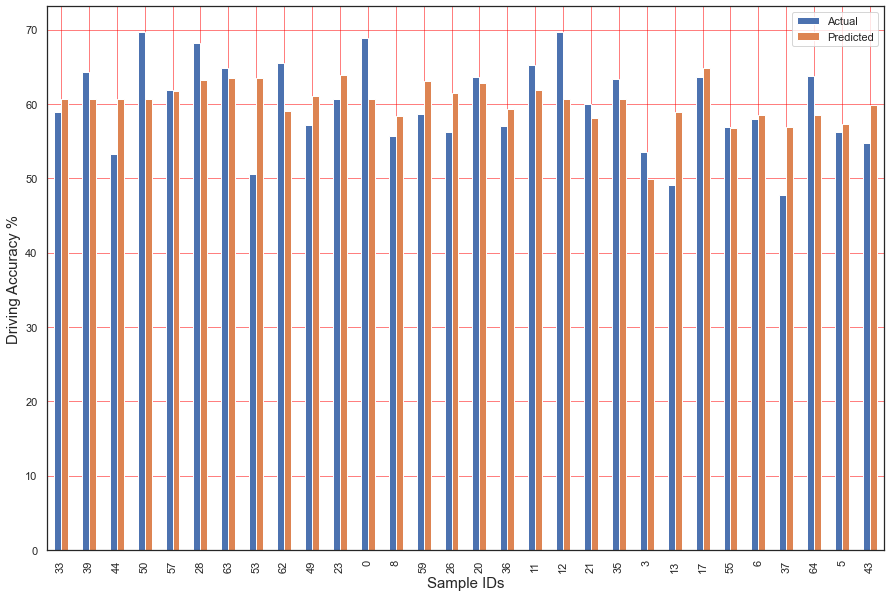

In [59]:
df1 = df_new.sample(30)
df1.plot(kind = 'bar', figsize=(15,10))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'red')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'yellow')
plt.xlabel('Sample IDs', fontsize = 15)
plt.ylabel('Driving Accuracy %', fontsize=15)
plt.show()


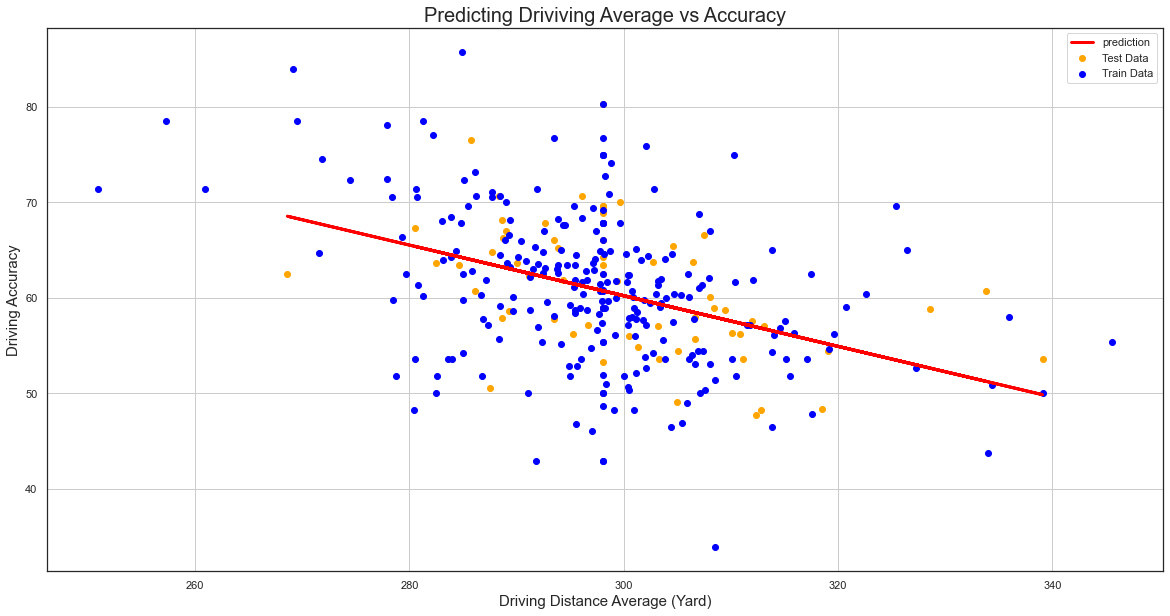

In [57]:
plt.figure(figsize=(20,10))
plt.grid()
plt.scatter(X_test, y_test, color = 'orange', label='Test Data', alpha=1.0)
plt.legend()
plt.scatter(X_train, y_train, color = 'blue', label='Train Data', alpha=1.0)
plt.legend()
plt.plot(X_test, y_pred, color = 'red', linewidth = 3, label= 'prediction')
plt.legend()
plt.title('Predicting Driviving Average vs Accuracy', fontsize=20)
plt.xlabel('Driving Distance Average (Yard)', fontsize = 15)
plt.ylabel('Driving Accuracy', fontsize=15)
plt.show()

In [70]:
## Errors
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2 score: {r2:.2f}')

MAE: 4.78
MSE: 36.99
RMSE: 6.08
R2 score: 0.19


root mean squared error is 6.08, which shows that the model of linear regression does not predict really well 

In [71]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(df_final['Driving_Avg_mean'], value=298)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.913269593400812
accept null hypothesis
